# Wind direction check on L0 fluxes

In [1]:
from diive.pkgs.corrections.winddiroffset import WindDirOffset
from diive.core.plotting.heatmap_datetime import HeatmapDateTime
from diive.core.io.files import load_parquet

In [2]:
SOURCEFILE = r"..\0_data\OPENLAG-IRGA-Level-0_fluxnet_2024-2025.05\FLUXES_L0_ALL.parquet"
df = load_parquet(filepath=SOURCEFILE)
df

Loaded .parquet file ..\0_data\OPENLAG-IRGA-Level-0_fluxnet_2024-2025.05\FLUXES_L0_ALL.parquet (0.123 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


,AIR_MV,AIR_DENSITY,AIR_RHO_CP,AIR_CP,AOA_METHOD,AXES_ROTATION_METHOD,BOWEN,BURBA_METHOD,BADM_LOCATION_LAT,BADM_LOCATION_LONG,BADM_LOCATION_ELEV,BADM_HEIGHTC,BADM_INST_SAMPLING_INT,BADM_INST_AVERAGING_INT,BADM_INST_MODEL_SA,...,W_T_SONIC_COV_IBROM_N0004,W_NUM_SPIKES,WD_FILTER_NREX,W_SPIKE_NREX,W_ABSLIM_NREX,W_VM97_TEST,W_LGD,W_KID,W_ZCD,W_ITC,W_ITC_TEST,WBOOST_APPLIED,WPL_APPLIED,ZL,ZL_UNCORR
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-02-06 19:15:00,0.024925,1.16151,1172.76,1009.69,0.0,1.0,10.891900,0.0,47.4189,8.49131,527.0,1.5,20.0,30.0,NaN,...,NaN,8.0,0.0,12.0,0.0,800001111.0,0.0,14.19660,553.0,0.0,1.0,0.0,1.0,0.183948,0.183832
2024-02-06 19:45:00,0.024887,1.16327,1174.52,1009.67,0.0,1.0,-6.056420,0.0,47.4189,8.49131,527.0,1.5,20.0,30.0,NaN,...,NaN,25.0,0.0,50.0,0.0,800001111.0,0.0,34.68890,1367.0,147.0,6.0,0.0,1.0,15.713200,14.966900
2024-02-06 20:15:00,0.024873,1.16394,1175.18,1009.65,0.0,1.0,-78.943400,0.0,47.4189,8.49131,527.0,1.5,20.0,30.0,NaN,...,NaN,5.0,0.0,9.0,0.0,800000111.0,0.0,6.19836,1869.0,46.0,3.0,0.0,1.0,0.241629,0.240051
2024-02-06 20:45:00,0.024854,1.16486,1176.07,1009.62,0.0,1.0,-70.254600,0.0,47.4189,8.49131,527.0,1.5,20.0,30.0,NaN,...,NaN,0.0,0.0,0.0,0.0,800000111.0,0.0,6.21726,2925.0,47.0,3.0,0.0,1.0,0.299208,0.297071
2024-02-06 21:15:00,0.024843,1.16534,1176.53,1009.60,0.0,1.0,41.320200,0.0,47.4189,8.49131,527.0,1.5,20.0,30.0,NaN,...,NaN,0.0,0.0,0.0,0.0,800000011.0,0.0,5.81718,3679.0,29.0,2.0,0.0,1.0,1.793680,1.762830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-01 22:45:00,0.025357,1.14103,1158.98,1015.73,0.0,1.0,0.476248,0.0,47.4189,8.49131,527.0,1.5,20.0,30.0,NaN,...,NaN,0.0,0.0,0.0,0.0,800000011.0,0.0,6.96959,3626.0,14.0,1.0,0.0,1.0,0.921111,0.987634
2025-06-01 23:15:00,0.025339,1.14183,1159.71,1015.66,0.0,1.0,-0.093278,0.0,47.4189,8.49131,527.0,1.5,20.0,30.0,NaN,...,NaN,0.0,0.0,0.0,0.0,800000011.0,0.0,6.79647,4180.0,30.0,2.0,0.0,1.0,0.551201,0.254533
2025-06-01 23:45:00,0.025339,1.14180,1160.04,1015.97,0.0,1.0,-0.073953,0.0,47.4189,8.49131,527.0,1.5,20.0,30.0,NaN,...,NaN,0.0,0.0,0.0,0.0,800000011.0,0.0,5.84279,735.0,31.0,3.0,0.0,1.0,0.107364,0.028980


Working on year 2024 ...
Working on year 2025 ...
     YEAR  OFFSET
0  2024.0     0.0
1  2025.0     1.0
TIMESTAMP_MIDDLE
2024-02-06 19:15:00    172.713
2024-02-06 19:45:00    180.467
2024-02-06 20:15:00    183.015
2024-02-06 20:45:00    189.732
2024-02-06 21:15:00    196.681
                        ...   
2025-06-01 22:45:00    214.139
2025-06-01 23:15:00    218.704
2025-06-01 23:45:00    214.562
2025-06-02 00:15:00    219.221
2025-06-02 00:45:00    201.150
Name: WD, Length: 21804, dtype: float64


F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\core\plotting\heatmap_base.py:100: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


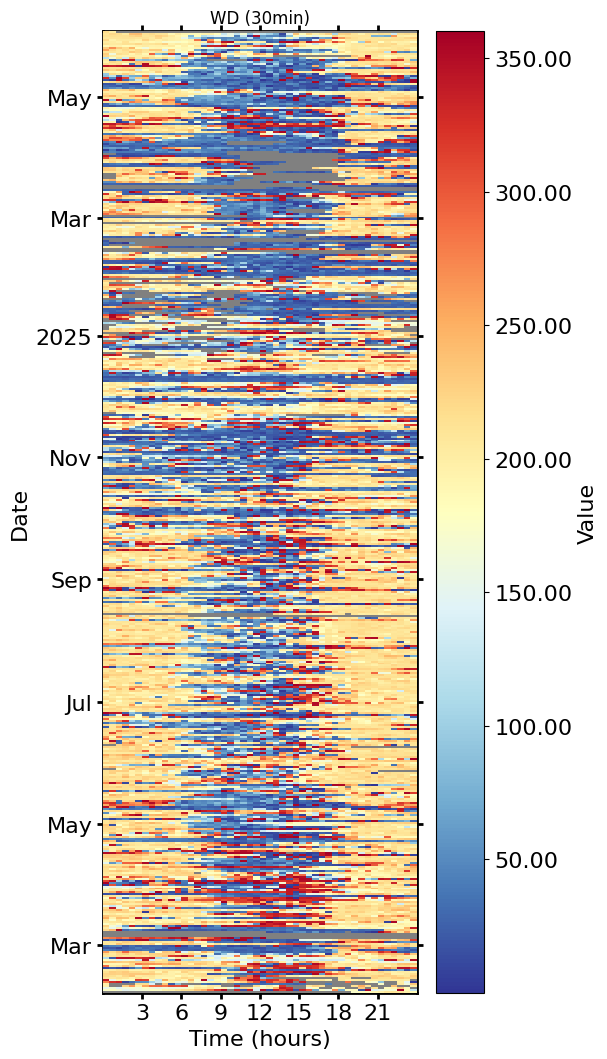

In [5]:
col = 'WD'
wd = df[col].copy()

# Prepare input data
wd = wd.loc[wd.index.year >= 2024]
wd = wd.dropna()

wds = WindDirOffset(winddir=wd, offset_start=-50, offset_end=50, hist_ref_years=[2024], hist_n_bins=360)
yearlyoffsets_df = wds.get_yearly_offsets()
print(yearlyoffsets_df)
print(wd)
HeatmapDateTime(series=wd).show()

# s_corrected = wds.get_corrected_wind_directions()
# print(s_corrected)
# HeatmapDateTime(series=s_corrected).show()

In [6]:
yearlyoffsets_df

,YEAR,OFFSET
0,2024.0,0.0
1,2025.0,1.0
